### Required libraries and configuring seaborn style

In [1066]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
sns.set_theme(context = 'notebook' , palette = 'seismic' , font_scale = 0.8 , style = 'darkgrid' , rc = {'figure.figsize':[16 , 7]})

In [1067]:
df = pd.read_csv('Titanic.csv')

In [1068]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1069]:
df.duplicated().sum()

0

In [1070]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1071]:
df.drop(['Cabin' , 'Ticket' , 'Name'] , axis = 1 , inplace=True)

In [1072]:
df.duplicated().sum()

0

In [1073]:
from sklearn.impute import KNNImputer

In [1074]:
imputer = KNNImputer()

In [1075]:
df['Age1']=imputer.fit_transform(df[['Age']])

In [1076]:
df['Age1']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age1, Length: 891, dtype: float64

In [1077]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Age1             0
dtype: int64

In [1078]:
df.drop('Age' , axis =1 , inplace=True)

In [1079]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age1
0,1,0,3,male,1,0,7.2500,S,22.000000
1,2,1,1,female,1,0,71.2833,C,38.000000
2,3,1,3,female,0,0,7.9250,S,26.000000
3,4,1,1,female,1,0,53.1000,S,35.000000
4,5,0,3,male,0,0,8.0500,S,35.000000
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.000000
887,888,1,1,female,0,0,30.0000,S,19.000000
888,889,0,3,female,1,2,23.4500,S,29.699118
889,890,1,1,male,0,0,30.0000,C,26.000000


In [1080]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1081]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1082]:
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)

In [1083]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='Age1'>

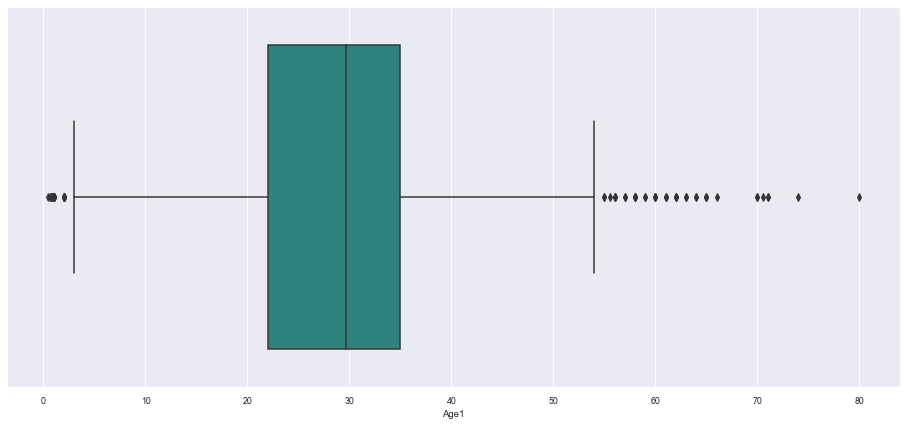

In [1084]:
sns.boxplot(x='Age1', data=df, palette='viridis')

In [1085]:
from datasist.structdata import detect_outliers

In [1086]:
outliers = detect_outliers(df , 0 , ['Age1'])

In [1087]:
len(outliers)

66

In [1088]:
df.drop(outliers , axis =0 , inplace=True)

In [1089]:
df.reset_index(inplace=True , drop=True)

<AxesSubplot:xlabel='Age1'>

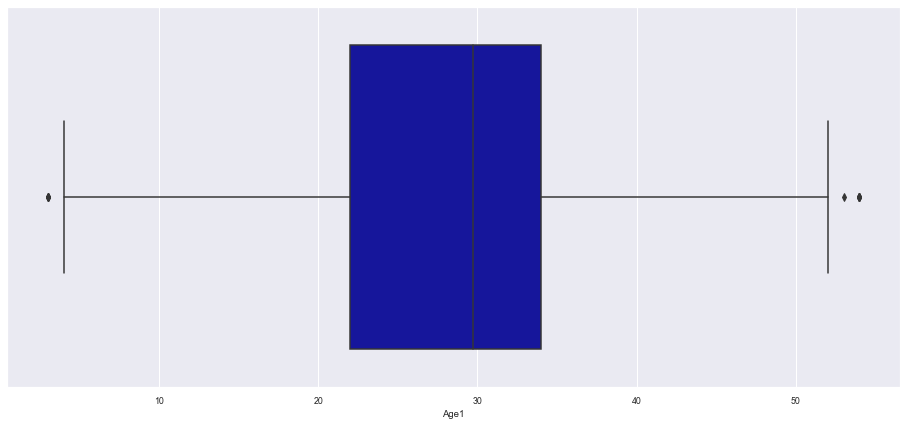

In [1090]:
sns.boxplot(data = df , x='Age1')

<AxesSubplot:xlabel='Fare'>

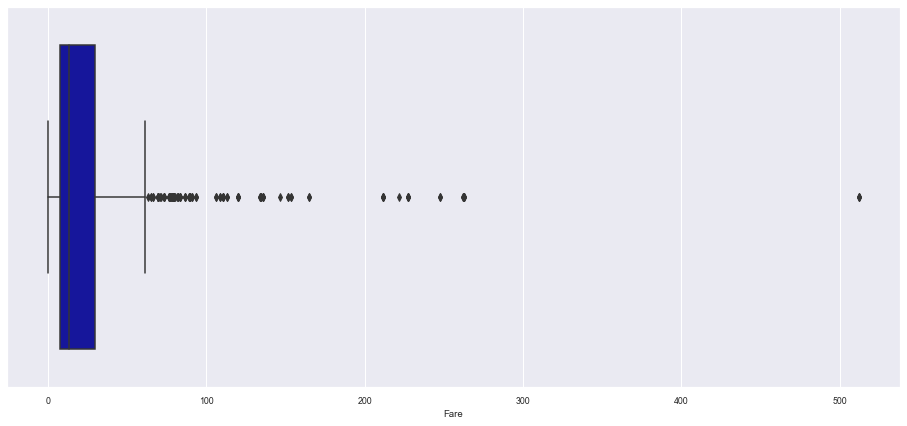

In [1091]:
sns.boxplot(data = df , x='Fare')

In [1092]:
from sklearn.preprocessing import OneHotEncoder

In [1093]:
encder = OneHotEncoder(sparse=False,drop="first")

In [1094]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
820    S
821    S
822    S
823    C
824    Q
Name: Embarked, Length: 825, dtype: object

In [1095]:
transformed = encder.fit_transform(df[["Sex" ,"Embarked"]])

In [1096]:
transformed_df = pd.DataFrame(transformed , columns=encder.get_feature_names_out())

In [1097]:
df.reset_index(inplace=True , drop=True)

In [1098]:
df = pd.concat([df , transformed_df] , axis = 1)

In [1099]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age1,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,male,1,0,7.2500,S,22.000000,1.0,0.0,1.0
1,2,1,1,female,1,0,71.2833,C,38.000000,0.0,0.0,0.0
2,3,1,3,female,0,0,7.9250,S,26.000000,0.0,0.0,1.0
3,4,1,1,female,1,0,53.1000,S,35.000000,0.0,0.0,1.0
4,5,0,3,male,0,0,8.0500,S,35.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
820,887,0,2,male,0,0,13.0000,S,27.000000,1.0,0.0,1.0
821,888,1,1,female,0,0,30.0000,S,19.000000,0.0,0.0,1.0
822,889,0,3,female,1,2,23.4500,S,29.699118,0.0,0.0,1.0
823,890,1,1,male,0,0,30.0000,C,26.000000,1.0,0.0,0.0


In [1100]:
df.drop(['Sex','Embarked'], axis =1 , inplace =True)

In [1101]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age1,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,22.000000,1.0,0.0,1.0
1,2,1,1,1,0,71.2833,38.000000,0.0,0.0,0.0
2,3,1,3,0,0,7.9250,26.000000,0.0,0.0,1.0
3,4,1,1,1,0,53.1000,35.000000,0.0,0.0,1.0
4,5,0,3,0,0,8.0500,35.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
820,887,0,2,0,0,13.0000,27.000000,1.0,0.0,1.0
821,888,1,1,0,0,30.0000,19.000000,0.0,0.0,1.0
822,889,0,3,1,2,23.4500,29.699118,0.0,0.0,1.0
823,890,1,1,0,0,30.0000,26.000000,1.0,0.0,0.0


In [1102]:
from sklearn.model_selection import train_test_split

In [1103]:
x=df.drop('Survived' , axis=1)
y=df['Survived']

In [1104]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=7 , stratify=y ,shuffle=True , train_size=80)

In [1105]:
from sklearn.preprocessing import RobustScaler , StandardScaler

In [1106]:
scaler = RobustScaler()
scaler1 = StandardScaler()

In [1107]:
col_to_scalled = ['Fare']
col_to_scalled1 = ['Age1']

In [1108]:
x_train[col_to_scalled]=scaler.fit_transform(x_train[col_to_scalled])
x_train[col_to_scalled1]=scaler1.fit_transform(x_train[col_to_scalled1])

In [1109]:
x_test[col_to_scalled]=scaler.transform(x_test[col_to_scalled])
x_test[col_to_scalled1]=scaler1.transform(x_test[col_to_scalled1])

In [1110]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

In [1111]:
Rs = RandomUnderSampler()
rs1= RandomOverSampler() 

In [1112]:
#x_train , y_train = Rs.fit_resample(x_train,y_train )
#x_train , y_train = rs1.fit_resample(x_train,y_train)

In [1113]:
from sklearn.linear_model import LogisticRegression

In [1114]:
model= LogisticRegression(max_iter=1000)

In [1115]:
model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [1116]:
y_pred=model.predict(x_test)

In [1117]:
from sklearn.metrics import accuracy_score 

In [1118]:
accuracy_score(y_test , y_pred)

0.793939393939394

In [1119]:
accuracy_score(y_train , model.predict(x_train))

0.825

In [1121]:
y_train.value_counts(normalize=True)

0    0.625
1    0.375
Name: Survived, dtype: float64

In [1123]:
y_test.value_counts(normalize=True)

0    0.618182
1    0.381818
Name: Survived, dtype: float64